In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

df = pd.read_csv("data_clean.csv")
print("✅ Dữ liệu đã được tải thành công!")

✅ Dữ liệu đã được tải thành công!


#### TỔNG QUAN DỮ LIỆU

In [2]:
print("\n--- Thông tin tổng quan ---")
print(df.info())
print("\n--- Thống kê mô tả ---")
print(df.describe())
print("\n--- Số lượng giá trị thiếu ---")
print(df.isna().sum())


--- Thông tin tổng quan ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Mã sản phẩm            82 non-null     int64  
 1   Tên sản phẩm           82 non-null     object 
 2   Danh mục               82 non-null     object 
 3   Thương hiệu            82 non-null     object 
 4   Xuất xứ                82 non-null     object 
 5   Giá gốc                82 non-null     float64
 6   Giá bán hiện tại       82 non-null     float64
 7   Giảm giá               82 non-null     float64
 8   Định lượng             82 non-null     object 
 9   Số lượng đã bán        82 non-null     int64  
 10  Số lượng hàng tồn kho  82 non-null     int64  
 11  Số lượt xem sản phẩm   82 non-null     int64  
 12  Điểm đánh giá          82 non-null     float64
 13  Số lượng đánh giá      82 non-null     int64  
 14  Mùa phổ biến           82 non-n

#### PHÂN TÍCH GIÁ & GIẢM GIÁ

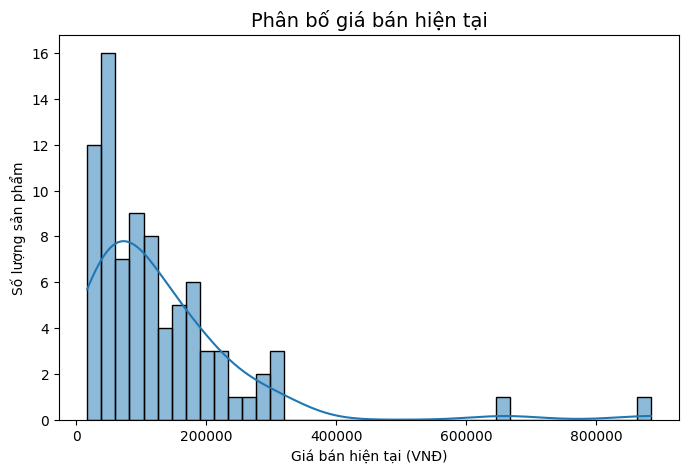

In [3]:
plt.figure(figsize=(8,5))
sns.histplot(df["Giá bán hiện tại"], bins=40, kde=True)
plt.title("Phân bố giá bán hiện tại", fontsize=14)
plt.xlabel("Giá bán hiện tại (VNĐ)")
plt.ylabel("Số lượng sản phẩm")
plt.show()

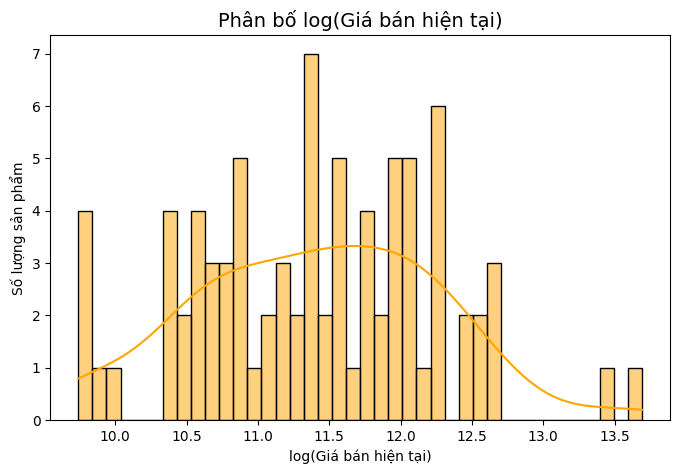

In [4]:
# Dùng log-scale để thấy rõ hơn nhóm giá thấp - cao
plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["Giá bán hiện tại"]), bins=40, kde=True, color="orange")
plt.title("Phân bố log(Giá bán hiện tại)", fontsize=14)
plt.xlabel("log(Giá bán hiện tại)")
plt.ylabel("Số lượng sản phẩm")
plt.show()

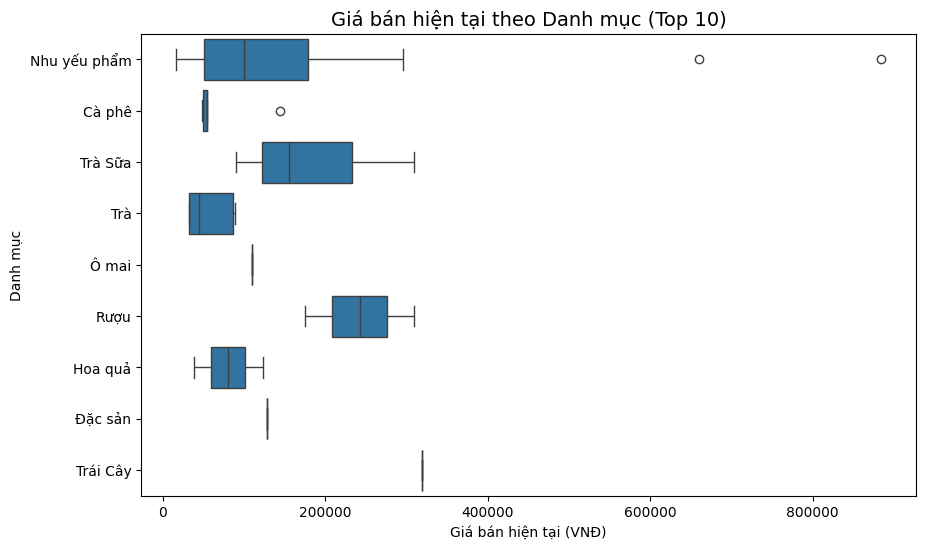

In [5]:
# Boxplot: Giá theo danh mục
plt.figure(figsize=(10,6))
top_cats = df["Danh mục"].value_counts().head(10).index
sns.boxplot(data=df[df["Danh mục"].isin(top_cats)], x="Giá bán hiện tại", y="Danh mục")
plt.title("Giá bán hiện tại theo Danh mục (Top 10)", fontsize=14)
plt.xlabel("Giá bán hiện tại (VNĐ)")
plt.ylabel("Danh mục")
plt.show()

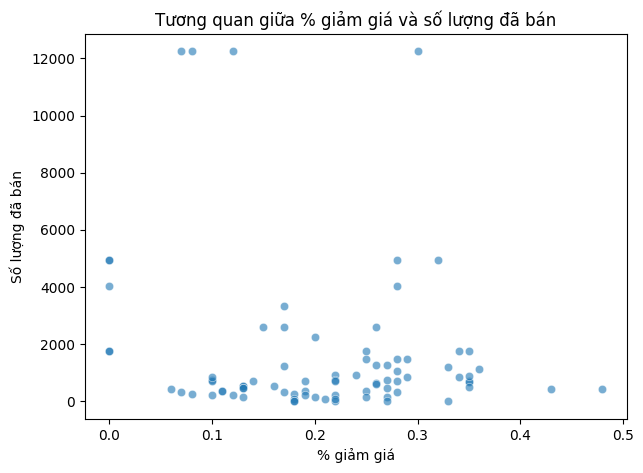

In [6]:
# Scatter: Giảm giá vs số lượng bán
plt.figure(figsize=(7,5))
sns.scatterplot(x="Giảm giá", y="Số lượng đã bán", data=df, alpha=0.6)
plt.title("Tương quan giữa % giảm giá và số lượng đã bán")
plt.xlabel("% giảm giá")
plt.ylabel("Số lượng đã bán")
plt.show()

#### PHÂN TÍCH THƯƠNG HIỆU & XUẤT XỨ

In [7]:
print("\n--- Top 10 thương hiệu có nhiều sản phẩm nhất ---")
print(df["Thương hiệu"].value_counts().head(10))


--- Top 10 thương hiệu có nhiều sản phẩm nhất ---
Thương hiệu
Thuỷ sản Cát Hải     20
Miliket              14
Indomie               7
VẠN CÁT               6
FOODMAP               6
UFO Coffee            5
Maloca                4
Koreno                3
Savo                  3
Đặc sản ngon lành     3
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_5540\3979391938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_brand_sales.values, y=top_brand_sales.index, palette="viridis")


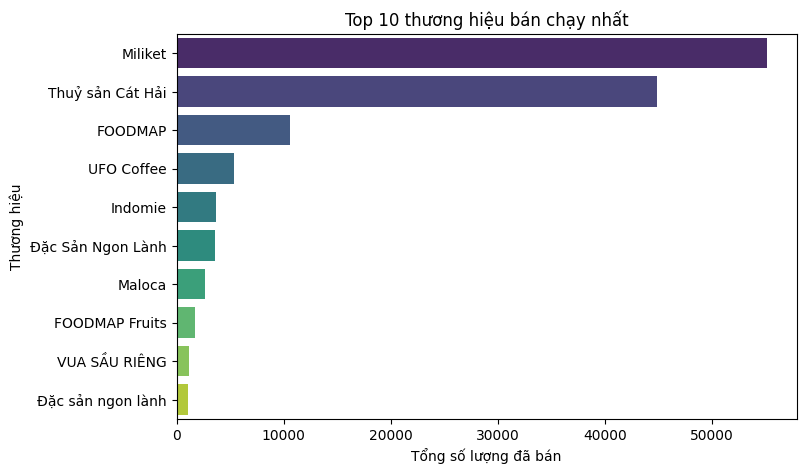

In [8]:
# Top thương hiệu bán chạy
top_brand_sales = df.groupby("Thương hiệu")["Số lượng đã bán"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_brand_sales.values, y=top_brand_sales.index, palette="viridis")
plt.title("Top 10 thương hiệu bán chạy nhất")
plt.xlabel("Tổng số lượng đã bán")
plt.ylabel("Thương hiệu")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_5540\1290213341.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=origin_sales.values, y=origin_sales.index, palette="crest")


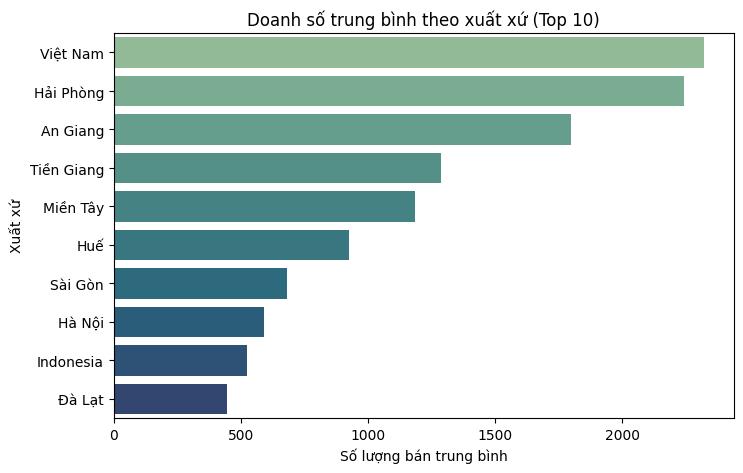

In [9]:
# Xuất xứ và doanh số trung bình
origin_sales = df.groupby("Xuất xứ")["Số lượng đã bán"].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=origin_sales.values, y=origin_sales.index, palette="crest")
plt.title("Doanh số trung bình theo xuất xứ (Top 10)")
plt.xlabel("Số lượng bán trung bình")
plt.ylabel("Xuất xứ")
plt.show()

#### PHÂN TÍCH DANH MỤC & LOẠI SẢN PHẨM

C:\Users\Admin\AppData\Local\Temp\ipykernel_5540\1532303787.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_cat_sales.values, y=top_cat_sales.index, palette="mako")


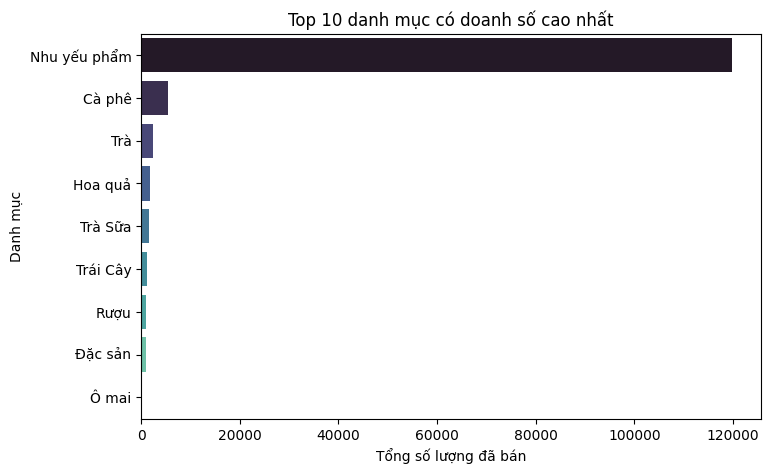

In [10]:
# Tổng doanh số theo danh mục
top_cat_sales = df.groupby("Danh mục")["Số lượng đã bán"].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
sns.barplot(x=top_cat_sales.values, y=top_cat_sales.index, palette="mako")
plt.title("Top 10 danh mục có doanh số cao nhất")
plt.xlabel("Tổng số lượng đã bán")
plt.ylabel("Danh mục")
plt.show()

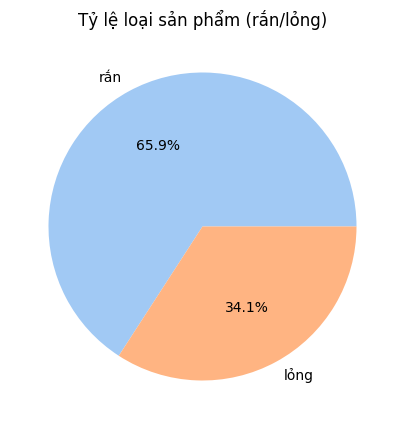

In [11]:
# Tỷ lệ loại sản phẩm (rắn/lỏng)
if "Loại sản phẩm" in df.columns:
    plt.figure(figsize=(5,5))
    df["Loại sản phẩm"].value_counts().plot.pie(autopct="%1.1f%%", colors=sns.color_palette("pastel"))
    plt.title("Tỷ lệ loại sản phẩm (rắn/lỏng)")
    plt.ylabel("")
    plt.show()

### Số lượng xem sản phẩm

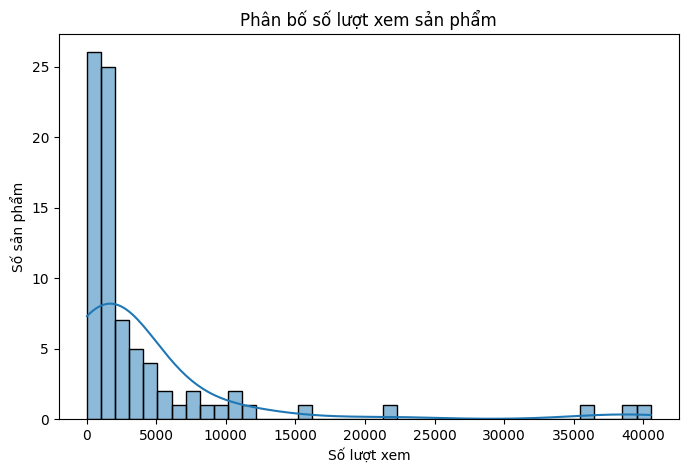

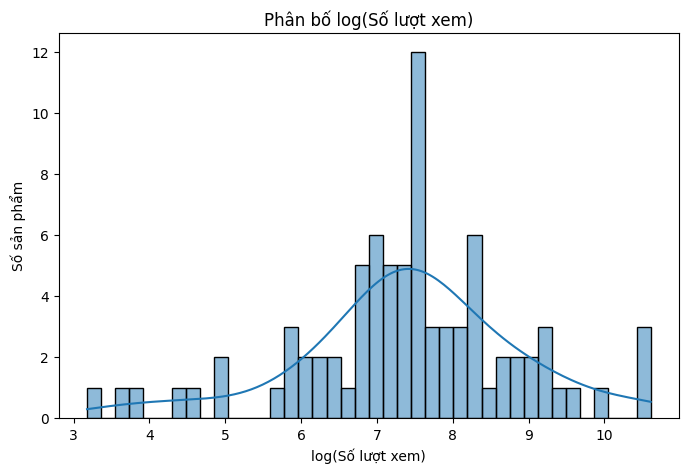

In [12]:
plt.figure(figsize=(8,5))
sns.histplot(df["Số lượt xem sản phẩm"], bins=40, kde=True)
plt.title("Phân bố số lượt xem sản phẩm")
plt.xlabel("Số lượt xem")
plt.ylabel("Số sản phẩm")
plt.show()

plt.figure(figsize=(8,5))
sns.histplot(np.log1p(df["Số lượt xem sản phẩm"]), bins=40, kde=True)
plt.title("Phân bố log(Số lượt xem)")
plt.xlabel("log(Số lượt xem)")
plt.ylabel("Số sản phẩm")
plt.show()

### Lượt xem vs số lượng bán

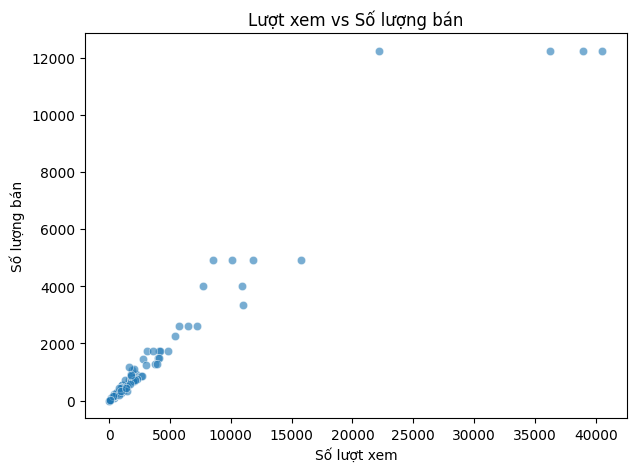

🔹 Tương quan lượt xem - bán: 0.970


In [13]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Số lượt xem sản phẩm",
    y="Số lượng đã bán",
    data=df,
    alpha=0.6
)
plt.title("Lượt xem vs Số lượng bán")
plt.xlabel("Số lượt xem")
plt.ylabel("Số lượng bán")
plt.show()

corr_view_sales = df[["Số lượt xem sản phẩm","Số lượng đã bán"]].corr().iloc[0,1]
print(f"🔹 Tương quan lượt xem - bán: {corr_view_sales:.3f}")


### Số lượng đánh giá

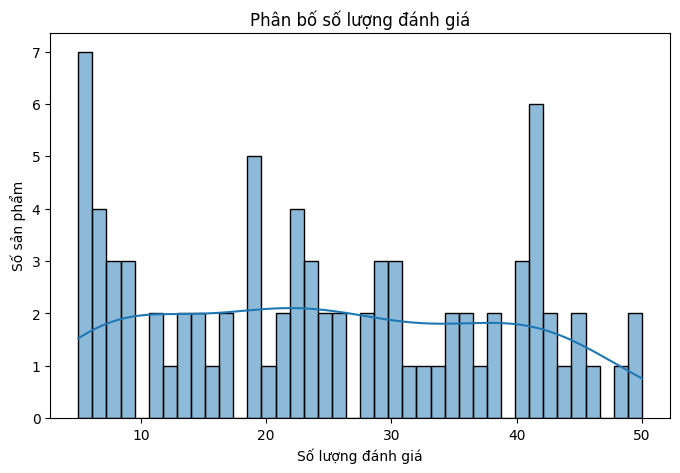

In [14]:
plt.figure(figsize=(8,5))
sns.histplot(df["Số lượng đánh giá"], bins=40, kde=True)
plt.title("Phân bố số lượng đánh giá")
plt.xlabel("Số lượng đánh giá")
plt.ylabel("Số sản phẩm")
plt.show()

### Số lượng đánh giá vs số lượng bán

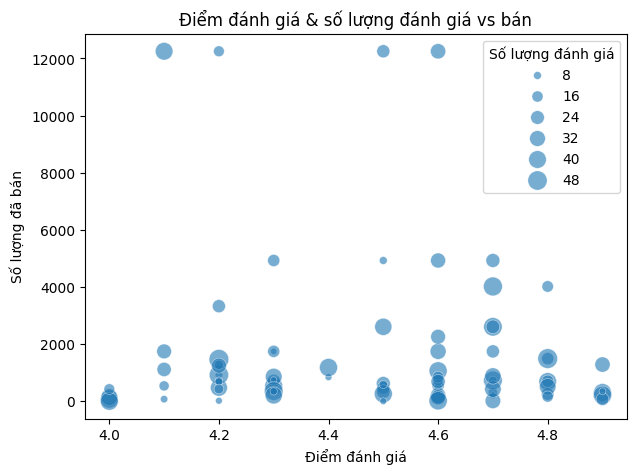

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Điểm đánh giá",
    y="Số lượng đã bán",
    size="Số lượng đánh giá",
    sizes=(20,200),
    data=df,
    alpha=0.6
)
plt.title("Điểm đánh giá & số lượng đánh giá vs bán")
plt.show()


### Số lượng hàng tồn kho

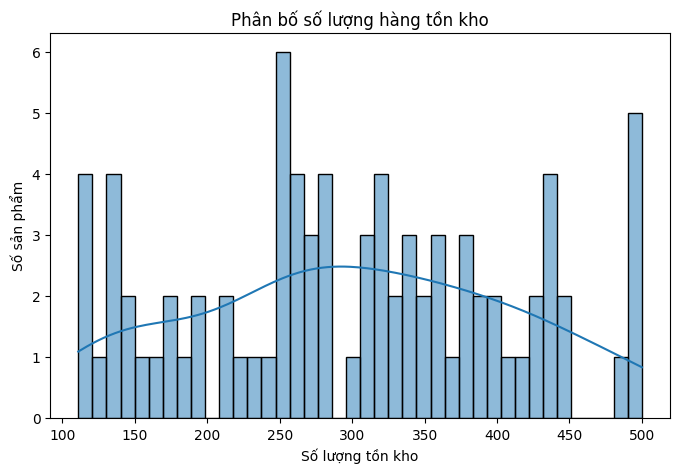

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Số lượng hàng tồn kho"], bins=40, kde=True)
plt.title("Phân bố số lượng hàng tồn kho")
plt.xlabel("Số lượng tồn kho")
plt.ylabel("Số sản phẩm")
plt.show()

### Số lượng hàng tồn kho vs số lượng bán

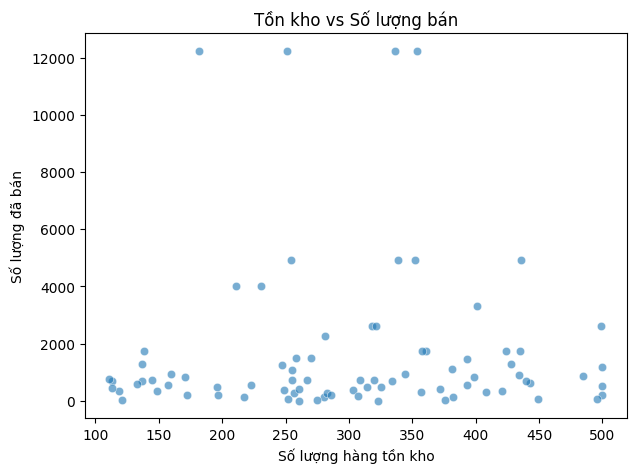

In [17]:
plt.figure(figsize=(7,5))
sns.scatterplot(
    x="Số lượng hàng tồn kho",
    y="Số lượng đã bán",
    data=df,
    alpha=0.6
)
plt.title("Tồn kho vs Số lượng bán")
plt.show()

### Ma trận tương quan 

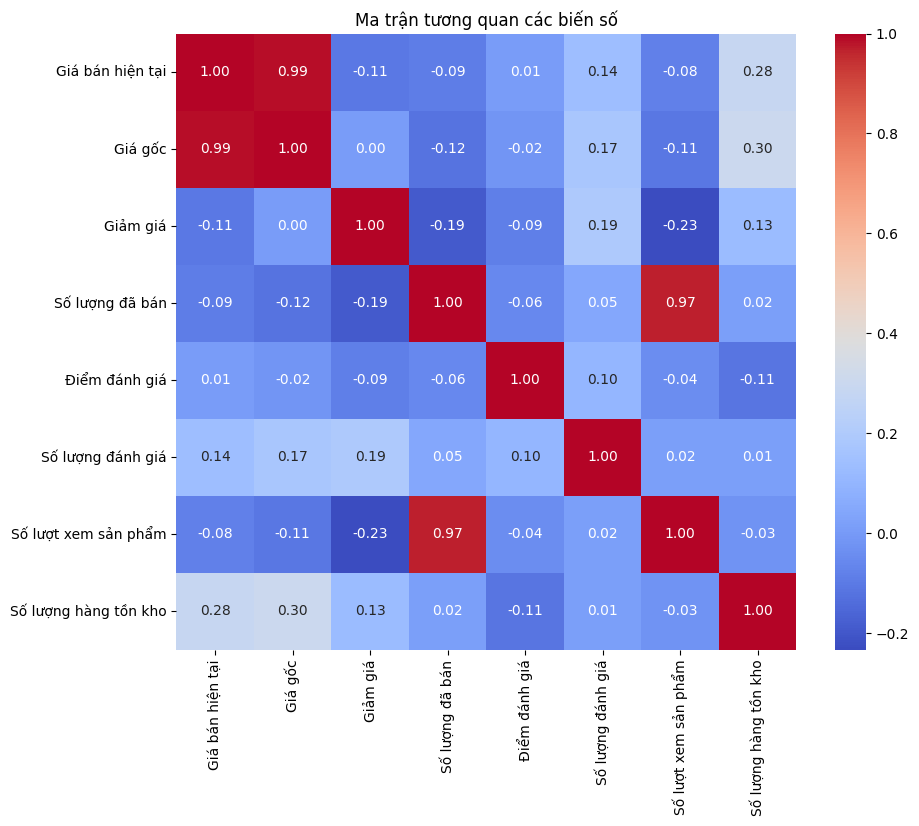

In [18]:
num_cols = [
    'Giá bán hiện tại','Giá gốc','Giảm giá',
    'Số lượng đã bán','Điểm đánh giá',
    'Số lượng đánh giá','Số lượt xem sản phẩm',
    'Số lượng hàng tồn kho'
]

corr = df[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Ma trận tương quan các biến số")
plt.show()


### Feature Engineering

In [19]:
df["price_ratio"] = df["Giá bán hiện tại"] / df["Giá gốc"]

df["rating_weighted"] = df["Điểm đánh giá"] * np.log1p(df["Số lượng đánh giá"])

df["view_to_sale_ratio"] = df["Số lượng đã bán"] / df["Số lượt xem sản phẩm"].replace(0, np.nan) #tỷ lệ chuyển đổi

df["stock_pressure"] = df["Số lượng đã bán"] / df["Số lượng hàng tồn kho"].replace(0, np.nan) # áp lực tồn kho